In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline

#### 1. Preliminary analysis of the data

    a. Understanding the data
    b. Missing values treatment
    c. Removing duplicates

In [2]:
dataset = pd.read_excel('cep1_dataset.xlsx')
dataset.shape

(303, 14)

In [3]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
dataset.drop_duplicates(inplace = True)
dataset.shape

(302, 14)

#### 2.	Prepare a report about the data explaining the distribution of the disease and the related factors

#### a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [7]:
numerical_columns = []
categorical_columns = []

for column in dataset.columns:
    if(len(dataset[column].value_counts())>5):
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)
categorical_columns

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

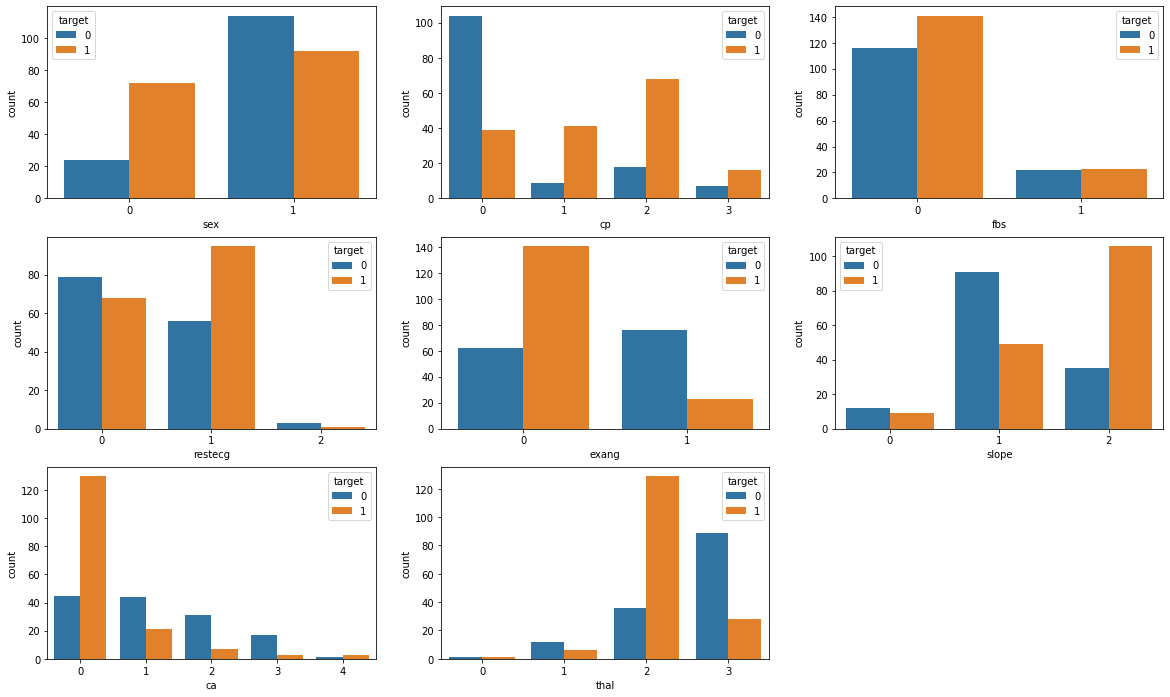

In [8]:
plt.figure(figsize = (20,12))
count = 0
for column in categorical_columns:
    if column == 'target':
        continue
    count = count + 1
    plt.subplot(3,3,count)
    sns.countplot(column, hue='target', data = dataset)

plt.show()

#### c.	Study the occurrence of CVD across the Age category

<b>Age categories: </b>

    1. 0 if age < 40
    2. 1 if 40 <= age < 50
    3. 2 if 50 <= age < 60
    4. 3 if age >=60
    


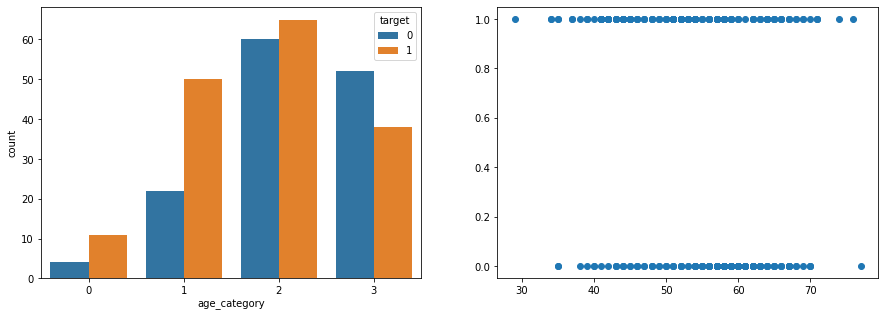

In [9]:
dataset['age_category'] = dataset['age'].apply(lambda x: 0 if x <40 else 1 
                                                 if x < 50 else 2 if x <60 else 3)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot('age_category', hue = 'target', data = dataset)
plt.subplot(1,2,2)
plt.scatter(dataset['age'], dataset['target'])
plt.show()

#### The count plot indicates that lower age groups might have higher incidents of CVD, even though the scatter plot indicates incidents of CVD spread across all age groups. 

#### d.	Study the composition of all patients with respect to the Sex category

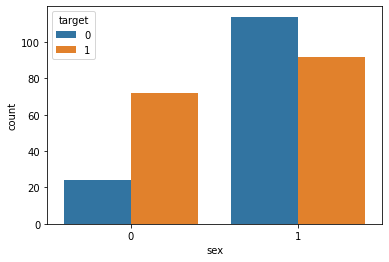

In [10]:
sns.countplot('sex', hue = 'target', data = dataset)
plt.show()

#### Sex = 0, i.e. females has significantly higher incidents of CVD

#### e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

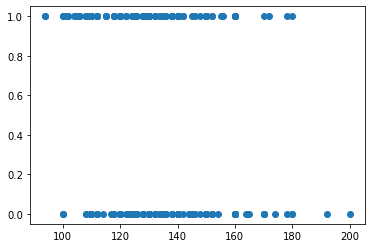

In [11]:
plt.scatter(dataset['trestbps'], dataset['target'])
plt.show()

#### Visually, it seems that there is no significant impact of anomalies in resting blood pressure on incidents of heart attacks. 

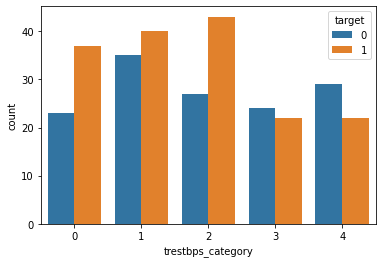

In [12]:
dataset['trestbps_category'] = dataset['trestbps'].apply(lambda x: 0 if x <120 else 1 
                                                 if x < 130 else 2 if x <140 else 3 if x <150 else 4)

sns.countplot('trestbps_category', hue = 'target', data = dataset)
plt.show()

#### The above countplot also does not indicate any major impact of resting blood pressure anomalies and heart attacks

#### f.	Describe the relationship between cholesterol levels and a target variable

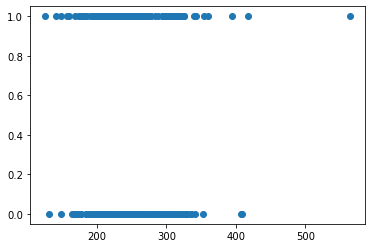

In [13]:
plt.scatter(dataset['chol'], dataset['target'])
plt.show()

#### The scatter plot does not show any relationship between cholesterol levels and the target variable

#### Plotting different cholesterol levels (categorized in buckets) against target variable on countplot to look for any trend

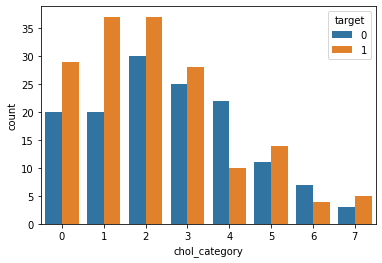

In [14]:
dataset['chol_category'] = dataset['chol'].apply(lambda x: 0 if x <200 else 1 
                                                 if x < 225 else 2 if x <250 else 3 if x <275 else 4
                                                if x < 300 else 5 if x < 325 else 6 if x < 350 else 7)

sns.countplot('chol_category', hue = 'target', data = dataset)
plt.show()

#### Visually, it seems that there is no significant impact of cholesterol levels on incidents of heart attacks. 

#### g.	State what relationship exists between peak exercising and the occurrence of a heart attack

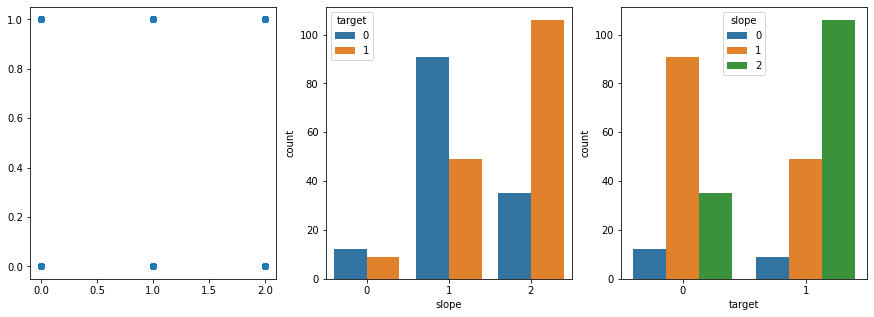

In [15]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.scatter(dataset['slope'], dataset['target'])
plt.subplot(1,3,2)
sns.countplot('slope', hue = 'target', data = dataset)
plt.subplot(1,3,3)
sns.countplot('target', hue = 'slope', data = dataset)
plt.show()

#### The countplot of slope & target does indicate potentially higher occurence of heart attack when slope of peak exercise = 2

#### h.	Check if thalassemia is a major cause of CVD

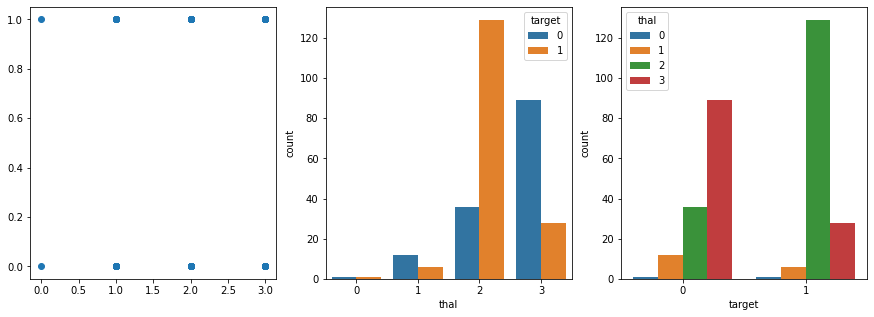

In [16]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.scatter(dataset['thal'], dataset['target'])
plt.subplot(1,3,2)
sns.countplot('thal', hue = 'target', data = dataset)
plt.subplot(1,3,3)
sns.countplot('target', hue = 'thal', data = dataset)
plt.show()

#### Thalessemia with 'thal' variable value 2 significantly raises the risk of CVD

#### i.	List how the other factors determine the occurrence of CVD

age
trestbps
chol
thalach
oldpeak


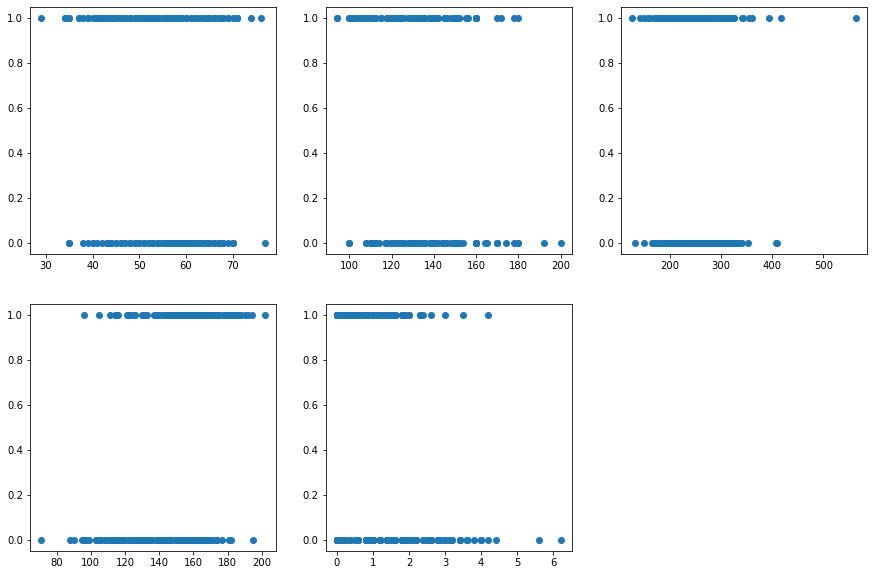

In [17]:
plt.figure(figsize = (15,10))
count = 0
for column in numerical_columns:
    count = count + 1
    plt.subplot(2,3, count)
    plt.scatter(dataset[column], dataset['target'])
    print(column)
plt.show()

#### Looking at the above chart, there might be a case for higher incidents of heart attack when maximum heart rate achieved (thalach) is higher. Requires an investigation by bucketing into sub categories

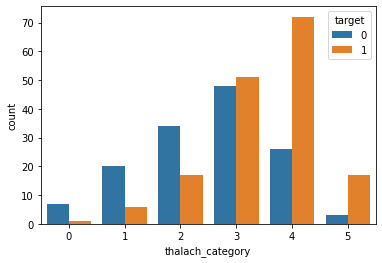

In [18]:
dataset['thalach_category'] = dataset['thalach'].apply(lambda x: 0 if x <100 else 1 
                                                 if x < 120 else 2 if x <140 else 3 if x <160 else 4
                                                if x < 180 else 5)

sns.countplot('thalach_category', hue = 'target', data = dataset)
plt.show()

#### The above chart clearly indicates that higher the maximum heart rate achieved, higher the incidents of heart attack. 

#### Also, the count plots in line # 8 indicate the following variables that may be important

1. ca (Number of major variables coloured by fluoroscopy)
2. cp (Chest pain type)
3. sex
4. exang (Exercise induced angina)
5. slope (Slope of the peak exercise ST segment)
6. thal (Thalessemia)

#### j.	Use a pair plot to understand the relationship between all the given variables

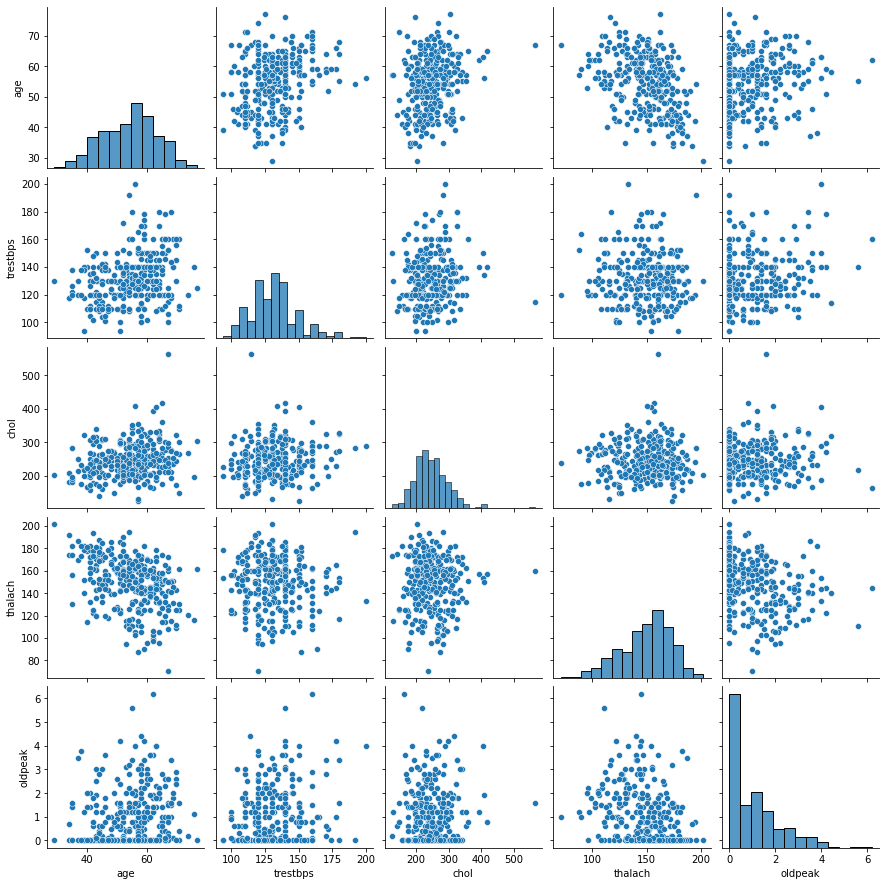

In [19]:
data_pair_plot = dataset[numerical_columns]

sns.pairplot(data_pair_plot)
plt.show()

#### There seems to be a negative correlation between 'age' and 'thalach'. This needs to be investigaged before building the model

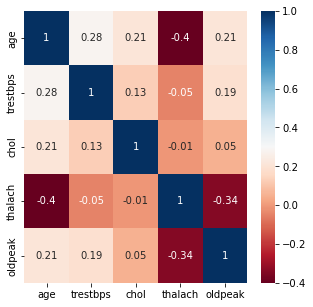

In [20]:
correlation_matrix = dataset[numerical_columns].corr().round(2)
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap = 'RdBu')
plt.show()

#### The auto-correlation is not significant, hence both variables can be used in the model

#### The intuition from the analysis so far is to use the following variables for building the model:

    1. ca 
    2. cp 
    3. sex
    4. exang 
    5. slope 
    6. thal
    7. age
    8. thalach

#### We will try some confirmation using statsmodels LogisticRegression

#### 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [21]:
import statsmodels.formula.api as smf

In [22]:
log_reg = smf.logit("target~ca + cp + sex + exang + slope + thal + age + thalach + chol + fbs + restecg + oldpeak + trestbps", 
                    data = dataset).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.348265
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                           13
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                  0.4949
Time:                        21:36:26   Log-Likelihood:                -105.18
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 7.740e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3042      2.578      1.282      0.200      -1.748       8.357
ca            -0.8260      0.202     -4.091      0.000      -1.222      -0.430
cp             0.8473      0.186      4.566      0.000       0.484       1.211
sex           -1.7509      0.468     -3.740      0.000      -2.669      -0.833
exang         -0.9810      0.410     -2.394      0.017      -1.784      -0.178
slope          0.5891      0.350      1.684      0.092      -0.097       1.275
thal          -0.8872      0.291     -3.052      0.002      -1.457      -0.317
age           -0.0015      0.023     -0.063      0.950      -0.047       0.045
thalach        0.0231      0.010      2.214      0.027       0.003       0.044
chol          -0.0045      0.004     -1.179      0.238      -0.012       0.003
fbs            0.0735      0.532      0.138      0.890      -0.970       1.117
restecg        0.4506      0.349      1.293      0.196      -0.232       1.134
oldpeak       -0.5236      0.214     -2.441      0.015      -0.944      -0.103
trestbps      -0.0202      0.010     -1.944      0.052      -0.041       0.000
==============================================================================
"""

#### From the above results for P value, we can eliminate restecg, fbs, age, chol and slope from the model and keep the remaining variables

#### Running the LogisticsRegression model again with the remaining variables

In [23]:
log_reg = smf.logit("target~ca + cp + sex + exang + thal + thalach + oldpeak + trestbps", data = dataset).fit()

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.359826
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            8
Date:                Sat, 29 Oct 2022   Pseudo R-squ.:                  0.4781
Time:                        21:36:27   Log-Likelihood:                -108.67
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 9.962e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9222      1.892      1.544      0.122      -0.786       6.631
ca            -0.7590      0.186     -4.072      0.000      -1.124      -0.394
cp             0.8177      0.178      4.604      0.000       0.470       1.166
sex           -1.5153      0.420     -3.604      0.000      -2.339      -0.691
exang         -0.9937      0.398     -2.496      0.013      -1.774      -0.213
thal          -0.8911      0.281     -3.175      0.001      -1.441      -0.341
thalach        0.0254      0.009      2.781      0.005       0.007       0.043
oldpeak       -0.6879      0.186     -3.689      0.000      -1.053      -0.322
trestbps      -0.0207      0.010     -2.112      0.035      -0.040      -0.001
==============================================================================
"""

In [24]:
model_data = dataset[['ca', 'cp', 'sex', 'exang', 'thal', 'thalach', 'oldpeak', 'trestbps']]

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

classifier = RandomForestClassifier()
logreg = LogisticRegression()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(model_data, dataset['target'], test_size=0.3, random_state=42)

In [27]:
classifier.fit(x_train, y_train)
classifier_pred = classifier.predict(x_test)

logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, classifier_pred)
print('RandomForestClassifier Confusion Matrix: ')
print(conf_matrix)
print('Count of Misclassified Samples: ', conf_matrix[0][1] + conf_matrix[1][0])
print('Accuracy Score:', accuracy_score(y_test, classifier_pred))

RandomForestClassifier Confusion Matrix: 
[[33  9]
 [10 39]]
Count of Misclassified Samples:  19
Accuracy Score: 0.7912087912087912


In [29]:
conf_matrix = confusion_matrix(y_test, logreg_pred)
print('LogisticRegression Confusion Matrix: ')
print(conf_matrix)
print('Count of Misclassified Samples: ', conf_matrix[0][1] + conf_matrix[1][0])
print('Accuracy Score:', accuracy_score(y_test, logreg_pred))

LogisticRegression Confusion Matrix: 
[[33  9]
 [ 6 43]]
Count of Misclassified Samples:  15
Accuracy Score: 0.8351648351648352


In [30]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

conf_matrix = confusion_matrix(y_test, svc_pred)
print('SVC Confusion Matrix: ')
print(conf_matrix)
print('Count of Misclassified Samples: ', conf_matrix[0][1] + conf_matrix[1][0])
print('Accuracy Score:', accuracy_score(y_test, svc_pred))

SVC Confusion Matrix: 
[[31 11]
 [ 5 44]]
Count of Misclassified Samples:  16
Accuracy Score: 0.8241758241758241


In [31]:
from sklearn.svm import NuSVC

svc = NuSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

conf_matrix = confusion_matrix(y_test, svc_pred)
print('SVC Confusion Matrix: ')
print(conf_matrix)
print('Count of Misclassified Samples: ', conf_matrix[0][1] + conf_matrix[1][0])
print('Accuracy Score:', accuracy_score(y_test, svc_pred))

SVC Confusion Matrix: 
[[33  9]
 [ 6 43]]
Count of Misclassified Samples:  15
Accuracy Score: 0.8351648351648352


In [32]:
from sklearn.svm import NuSVC

svc = NuSVC(kernel='poly')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

conf_matrix = confusion_matrix(y_test, svc_pred)
print('SVC Confusion Matrix: ')
print(conf_matrix)
print('Count of Misclassified Samples: ', conf_matrix[0][1] + conf_matrix[1][0])
print('Accuracy Score:', accuracy_score(y_test, svc_pred))

SVC Confusion Matrix: 
[[33  9]
 [ 6 43]]
Count of Misclassified Samples:  15
Accuracy Score: 0.8351648351648352
